In [2]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

## Test Host Mass Cut

In [3]:
def combine_deep_host(csfq, ssfq, masscut_low_host, masscut_low, z, path):
    try:
        affix = '_host_'+ str(masscut_low_host)+ '_'+ str(masscut_low) + '_' + str(csfq) + '_' + str(ssfq) + '_' + str(round(z, 1)) + '.txt'
        cosmos_deep = np.genfromtxt(path+'countCOSMOS_deep'+affix)
        sxds_uddd = np.genfromtxt(path+'countSXDS_uddd'+affix)
        elais_deep = np.genfromtxt(path+'countELAIS_deep'+affix)
        xmmlss_deep = np.genfromtxt(path+'countXMM-LSS_deep'+affix)
        deep_deep = np.genfromtxt(path+'countDEEP_deep'+affix)
    except IOError:
        affix = '_' + str(masscut_low) + '_' + str(csfq) + '_' + str(ssfq) + '_' + str(round(z, 1))
        cosmos_deep = np.genfromtxt(path+'countCOSMOS_deep'+affix)
        sxds_uddd = np.genfromtxt(path+'countSXDS_uddd'+affix)
        elais_deep = np.genfromtxt(path+'countELAIS_deep'+affix)
        xmmlss_deep = np.genfromtxt(path+'countXMM-LSS_deep'+affix)
        deep_deep = np.genfromtxt(path+'countDEEP_deep'+affix)
    
    n_cosmos = int(cosmos_deep[0])
    n_sxds = int(sxds_uddd[0])
    n_elais = int(elais_deep[0])
    n_xmmlss = int(xmmlss_deep[0])
    n_deep = int(deep_deep[0])
    n_combine = [n_cosmos, n_sxds, n_elais, n_xmmlss, n_deep]
    
    radial_cosmos = cosmos_deep[1:((len(cosmos_deep)-1)/2)+1]
    radial_sxds = sxds_uddd[1:((len(cosmos_deep)-1)/2)+1]
    radial_elais = elais_deep[1:((len(cosmos_deep)-1)/2)+1]
    radial_xmmlss = xmmlss_deep[1:((len(cosmos_deep)-1)/2)+1]
    radial_deep = deep_deep[1:((len(cosmos_deep)-1)/2)+1]
    radial_combine = [radial_cosmos, radial_sxds, radial_xmmlss, radial_deep, radial_elais]
    radial = np.average(radial_combine, axis=0, weights=n_combine)
    
    radial_cosmos_err = cosmos_deep[((len(cosmos_deep)-1)/2)+1:]
    radial_sxds_err = sxds_uddd[((len(cosmos_deep)-1)/2)+1:]
    radial_elais_err = elais_deep[((len(cosmos_deep)-1)/2)+1:]
    radial_xmmlss_err = xmmlss_deep[((len(cosmos_deep)-1)/2)+1:]
    radial_deep_err = deep_deep[((len(cosmos_deep)-1)/2)+1:]
    radial_combine_err = [radial_cosmos, radial_sxds, radial_xmmlss, radial_deep, radial_elais]
    radial_err = np.sqrt(radial_cosmos_err**2*n_cosmos**2+radial_xmmlss_err**2*n_xmmlss**2+radial_elais_err**2*n_elais**2+radial_sxds_err**2*n_sxds**2+radial_deep_err**2*n_deep**2)/np.sum(n_combine)
    return (radial, radial_err)

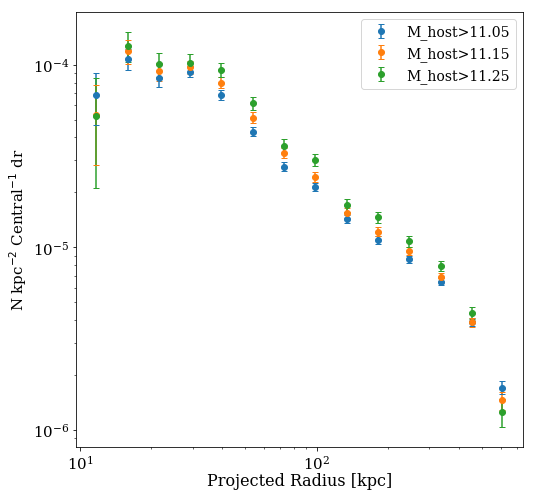

In [24]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(8,8))

# csfq, ssfq, masscut_low_host, masscut_low, z, path
path = 'CUT_deep_catalogs/test_host_mass/'
bin_centers = np.load('CUT_deep_catalogs/split_host_mass/bin_centers.npy')
radial_host_lm = combine_deep_host('all','all',11.05, 9.5, 0.6, path)
radial_host_mm = combine_deep_host('all','all',11.15, 9.5, 0.6, path)
radial_host_hm = combine_deep_host('all','all',11.25, 9.5, 0.6, path)

axs.errorbar(bin_centers,radial_host_lm[0],yerr=radial_host_lm[1],fmt='o',capsize=3,label='M_host>11.05')
axs.errorbar(bin_centers,radial_host_mm[0],yerr=radial_host_mm[1],fmt='o',capsize=3,label='M_host>11.15')
axs.errorbar(bin_centers,radial_host_hm[0],yerr=radial_host_hm[1],fmt='o',capsize=3,label='M_host>11.25')

axs.set_xscale('log')
axs.set_yscale('log')
axs.set_ylabel(r'N kpc$^{-2}$ Central$^{-1}$ dr',fontsize=15)
axs.legend(fontsize=14)

fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel('Projected Radius [kpc]', fontsize=16)
plt.savefig('figures/split_host_mass_sfProb.png')
plt.show()

## Test Masking Correction

In [13]:
def combine_deep(csfq, ssfq, masscut_low, masscut_high, z, path):
    affix = '_' + str(masscut_low) + '_' + str(csfq) + '_' + str(ssfq) + '_' + str(round(z, 1))+'.txt'
    cosmos_deep = np.genfromtxt(path+'countCOSMOS_deep'+affix)
    sxds_uddd = np.genfromtxt(path+'countSXDS_uddd'+affix)
    elais_deep = np.genfromtxt(path+'countELAIS_deep'+affix)
    xmmlss_deep = np.genfromtxt(path+'countXMM-LSS_deep'+affix)
    deep_deep = np.genfromtxt(path+'countDEEP_deep'+affix)

    n_cosmos = int(cosmos_deep[0])
    n_sxds = int(sxds_uddd[0])
    n_elais = int(elais_deep[0])
    n_xmmlss = int(xmmlss_deep[0])
    n_deep = int(deep_deep[0])
    n_combine = [n_cosmos, n_sxds, n_elais, n_xmmlss, n_deep]
    print('total number:',sum(n_combine))
    
    radial_cosmos = cosmos_deep[1:((len(cosmos_deep)-1)/2)+1]
    radial_sxds = sxds_uddd[1:((len(cosmos_deep)-1)/2)+1]
    radial_elais = elais_deep[1:((len(cosmos_deep)-1)/2)+1]
    radial_xmmlss = xmmlss_deep[1:((len(cosmos_deep)-1)/2)+1]
    radial_deep = deep_deep[1:((len(cosmos_deep)-1)/2)+1]
    radial_combine = [radial_cosmos, radial_sxds, radial_xmmlss, radial_deep, radial_elais]
    radial = np.average(radial_combine, axis=0, weights=n_combine)
    
    radial_cosmos_err = cosmos_deep[((len(cosmos_deep)-1)/2)+1:]
    radial_sxds_err = sxds_uddd[((len(cosmos_deep)-1)/2)+1:]
    radial_elais_err = elais_deep[((len(cosmos_deep)-1)/2)+1:]
    radial_xmmlss_err = xmmlss_deep[((len(cosmos_deep)-1)/2)+1:]
    radial_deep_err = deep_deep[((len(cosmos_deep)-1)/2)+1:]
    radial_combine_err = [radial_cosmos, radial_sxds, radial_xmmlss, radial_deep, radial_elais]
    radial_err = np.sqrt(radial_cosmos_err**2*n_cosmos**2+radial_xmmlss_err**2*n_xmmlss**2+radial_elais_err**2*n_elais**2+radial_sxds_err**2*n_sxds**2+radial_deep_err**2*n_deep**2)/np.sum(n_combine)
    return (radial, radial_err)

('total number:', 1557)
('total number:', 1557)
('total number:', 1557)


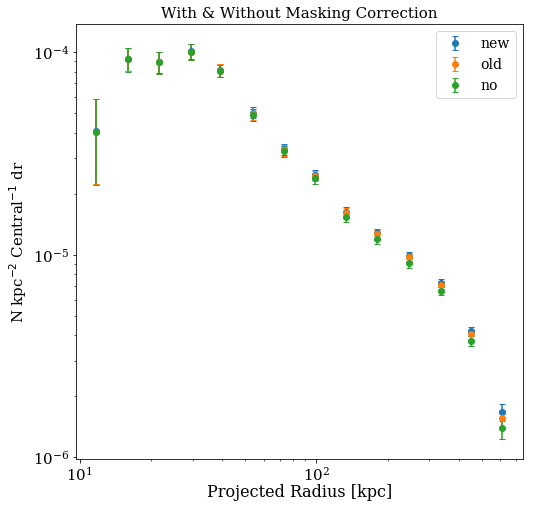

In [22]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(8,8))

# csfq, ssfq, masscut_low_host, masscut_low, z, path
bin_centers = np.load('CUT_deep_catalogs/without_mask_correction/bin_centers.npy')
radial_new_corr = combine_deep('all','all',9.5, 13.0, 0.6, path='CUT_deep_catalogs/with_mask_correction_new/')
radial_old_corr = combine_deep('all','all',9.5, 13.0, 0.6, path='CUT_deep_catalogs/with_mask_correction/')
radial_no_corr = combine_deep('all','all',9.5, 13.0, 0.6, path='CUT_deep_catalogs/without_mask_correction/')

axs.errorbar(bin_centers,radial_new_corr[0],yerr=radial_new_corr[1],fmt='o',capsize=3,label='new')
axs.errorbar(bin_centers,radial_old_corr[0],yerr=radial_old_corr[1],fmt='o',capsize=3,label='old')
axs.errorbar(bin_centers,radial_no_corr[0],yerr=radial_no_corr[1],fmt='o',capsize=3,label='no')

axs.set_title('With & Without Masking Correction',fontsize=15)
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_ylabel(r'N kpc$^{-2}$ Central$^{-1}$ dr',fontsize=15)
axs.legend(fontsize=14)

fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)

plt.xlabel('Projected Radius [kpc]', fontsize=16)
plt.savefig('figures/split_host_mass_sfProb.png')
plt.show()